# File Report Analysis

In [1]:
# Run this when developing since it reloads the code automatically when code is changed
%reload_ext autoreload  
# setud up autoroad 
%autoreload 2

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [2]:
%%capture
!jupyter nbextension enable --py --sys-prefix qgrid
!jupyter nbextension enable --py --sys-prefix widgetsnbextension

In [3]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [3]:
import qgrid
import ipywidgets as widgets
import ipython_blocking

In [4]:
import pandas as pd
import numpy as np
import json
from graphviz import Digraph
import matplotlib.pyplot as plt

In [5]:
import sys
sys.path.append("../")
from jupyter_apis.Report_API import Report

### So far we only have a report for scenario-1

In [7]:
scenarios = ['scenario-1', 'scenario-2']

selected_scenario = widgets.Dropdown(
    options     = scenarios,
    description = 'Scenario : ',
    disabled    = False,
    value       = None)

button = widgets.Button(description='Run')

box = widgets.VBox(children=[selected_scenario, button])
display(box)

<IPython.core.display.Javascript object>

In [10]:
%blockrun button

In [11]:
scenario = selected_scenario.value

report = Report(scenario, -1)

#from pprint import pprint
#data = report.get_dict_from_report()
#pprint(data)

files = report.get_files()

selected_file = widgets.Dropdown(
    options     = files,
    description = 'File : ',
    disabled    = False,
    value       = None)

button = widgets.Button(description='Run')

box = widgets.VBox(children=[selected_file, button])
display(box)

<IPython.core.display.Javascript object>

In [14]:
%blockrun button

In [15]:
file_id = files.index(selected_file.value)
report.file_id = file_id

## Document Summary

In [16]:
report.print_document_summary()

Total Size In Bytes : 7817
File Type : jpeg
Version : Not Applicable


## Extracted Items

In [17]:
report.print_extracted_items()

Item Count : 0


## Content Management Policy

In [18]:
content_management_policy = report.content_management_policy_df()
qgrid_widget = qgrid.show_grid(content_management_policy, show_toolbar=True)
qgrid_widget

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [19]:
camera_names = list(content_management_policy['Camera Name'].unique())

selected_camera = widgets.Dropdown(
    options     = camera_names,
    description = 'Camera : ',
    disabled    = False,
    value       = None)

button = widgets.Button(description='Run')

box = widgets.VBox(children=[selected_camera, button])
display(box)

<IPython.core.display.Javascript object>

In [22]:
%blockrun button

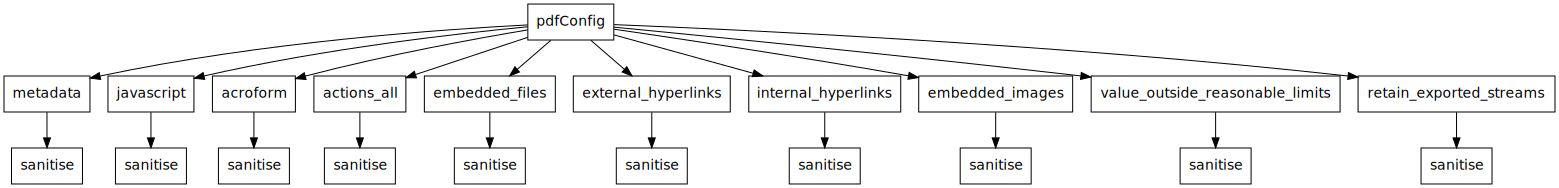

In [23]:
camera_value = selected_camera.value
report.camera_graph(camera_value)

## Content Groups

In [24]:
report.get_num_of_groups(text=True)

There are 3 groups


In [25]:
content_groups = report.content_groups_df()
qgrid_widget = qgrid.show_grid(content_groups, show_toolbar=True)
qgrid_widget

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [26]:
groups = list(content_groups['Brief Description'].unique())

selected_group = widgets.Dropdown(
    options     = groups,
    description = 'Groups : ',
    disabled    = False,
    value       = None)

button = widgets.Button(description='Run')

box = widgets.VBox(children=[selected_group, button])
display(box)

<IPython.core.display.Javascript object>

In [29]:
%blockrun button

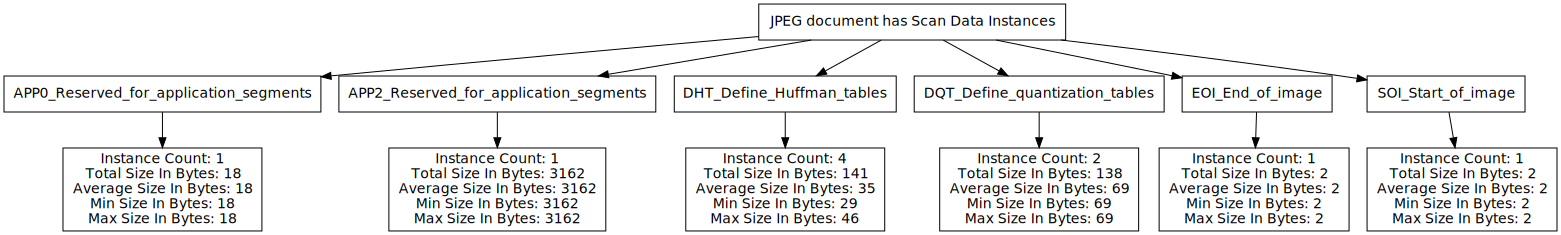

In [30]:
group_value = selected_group.value
report.group_graph(group_value)

In [31]:
group_df = report.group_df(group_value)
qgrid_widget = qgrid.show_grid(group_df, show_toolbar=True)
qgrid_widget

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

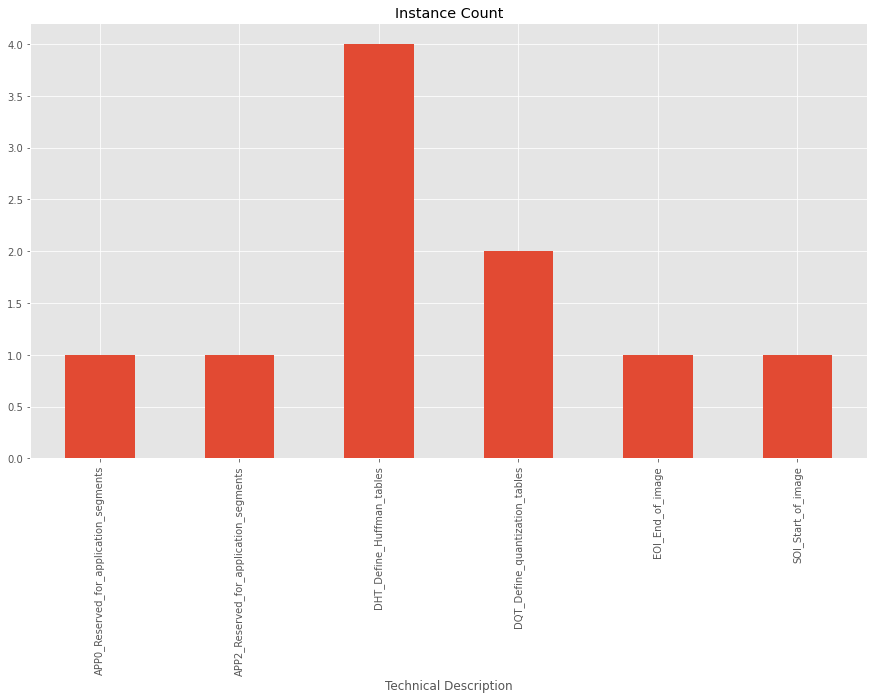

In [32]:
report.group_instance_count(group_value)

In [33]:
tech_descriptions = report.get_group_tech_descriptions(group_value) 

selected_tech = widgets.Dropdown(
    options     = tech_descriptions,
    description = 'Tech : ',
    disabled    = False,
    value       = None)

button = widgets.Button(description='Run')

box = widgets.VBox(children=[selected_tech, button])
display(box)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [45]:
%blockrun button

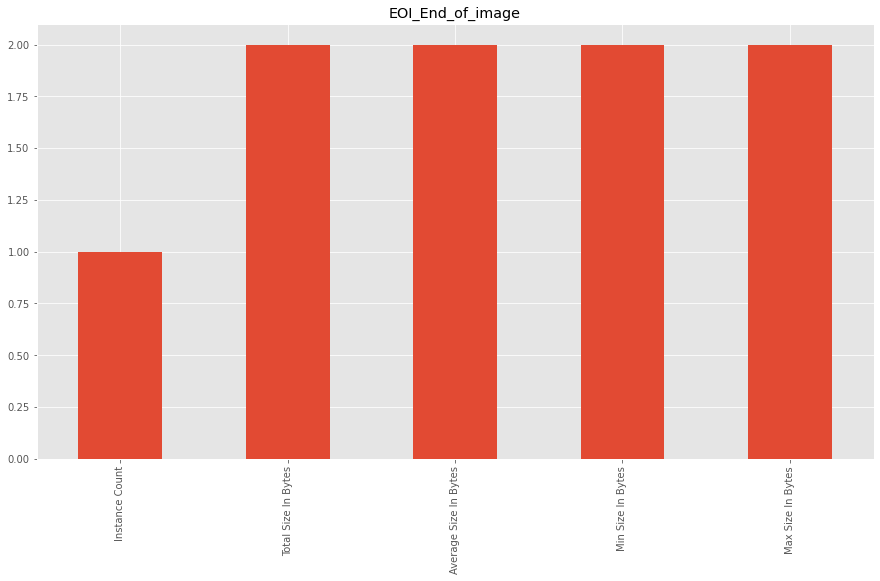

In [46]:
tech_value = selected_tech.value
report.group_tech_barchart_1(group_value, tech_value)

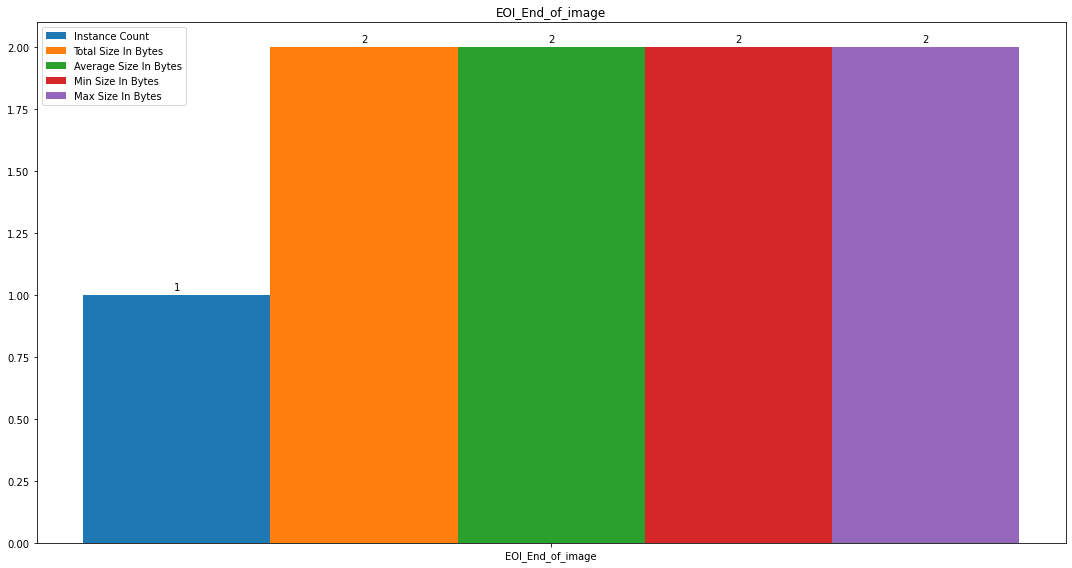

In [47]:
report.group_tech_barchart_2(group_value, tech_value)